In [ ]:
!pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"khueluong","key":"fa07b2a99eed1f69c6833a094a309ef6"}'}

In [ ]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 135MB/s]


In [ ]:
!unzip -q housedata.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('/content/data.csv')
df = data.copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape

(4600, 18)

In [ ]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

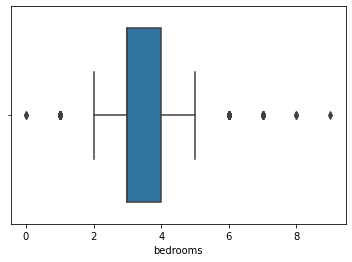

In [ ]:
sns.boxplot(x='bedrooms', data= df);
df.bedrooms.value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64

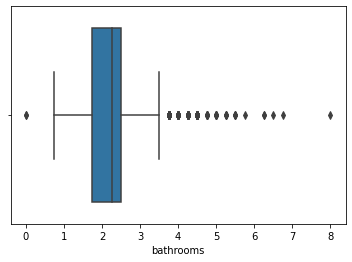

In [ ]:
sns.boxplot(x='bathrooms', data= df);
df.bathrooms.value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

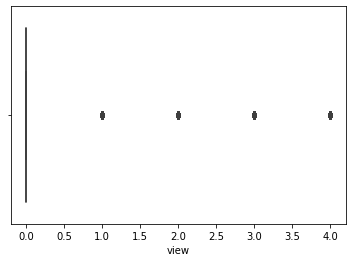

In [ ]:
sns.boxplot(x='view', data= df);
df.view.value_counts()

In [ ]:
df['country'].nunique()

1

In [ ]:
df['street'].nunique()

4525

In [ ]:
df['statezip'].nunique()

77

In [ ]:
df.corr()

In [ ]:
df[df["price"]==0].head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sqft_living for 0 price')

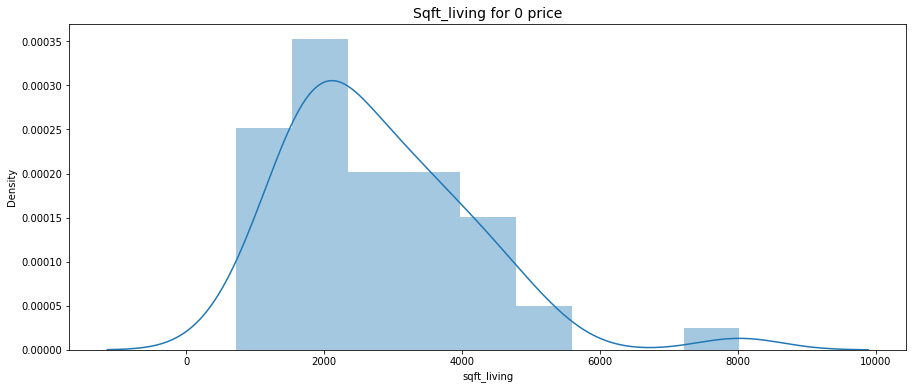

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.distplot(df[df["price"]==0].sqft_living)
ax.set_title('Sqft_living for 0 price', fontsize=14)

In [ ]:
df[df["price"]==0].agg([min, max, 'mean', 'median'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
min,2014-05-05 00:00:00,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,101-127 247th Ave SE,Auburn,WA 98001,USA
max,2014-07-08 00:00:00,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,9243 NE 20th St,Woodinville,WA 98199,USA
mean,NaN,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN,NaN,NaN,NaN
median,NaN,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN,NaN,NaN,NaN


In [ ]:
df1 = df[(df.bedrooms == 4) & (df.bathrooms > 1) & (df.bathrooms < 4) & (df.sqft_living > 2500) & 
         (df.sqft_living < 3000) & (df.floors < 3) & (df.yr_built < 1970)]

In [ ]:
df1.shape

(79, 18)

In [ ]:
df1.price.mean()

735475.0370705189

In [ ]:
df['price'].replace(to_replace = 0, value = 735000, inplace = True)
len(df[(df['price'] == 0)])

0

In [ ]:
df.bedrooms.value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

In [ ]:
bedroom = df.groupby(['bedrooms']).price.agg([len, min, max])
bedroom

,len,min,max
bedrooms,,,
0.0,2,1095000.0,1295648.0
1.0,38,80000.0,735000.0
2.0,566,7800.0,1695000.0
3.0,2032,83300.0,26590000.0
4.0,1531,84350.0,4489000.0
5.0,353,185000.0,7062500.0
6.0,61,175000.0,3100000.0
7.0,14,280000.0,3200000.0
8.0,2,340000.0,1970000.0


In [ ]:
bedrooms = df.groupby(['bedrooms']).sqft_living.agg([len, min, max])
bedrooms


,len,min,max
bedrooms,,,
0.0,2,3064,4810
1.0,38,370,2140
2.0,566,520,3180
3.0,2032,490,5230
4.0,1531,980,6640
5.0,353,1120,10040
6.0,61,1370,6980
7.0,14,1940,13540
8.0,2,2790,4440


3.0    2032
4.0    1531
2.0     566
5.0     353
1.0      38
Name: bedrooms, dtype: int64

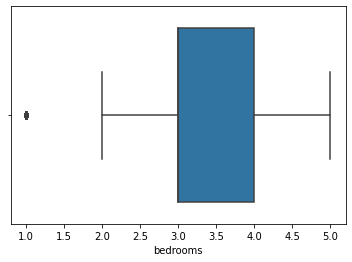

In [ ]:
df = df[(df['bedrooms'] > 0) & (df['bedrooms'] < 6)]
sns.boxplot(x='bedrooms', data= df);
df.bedrooms.value_counts()

Text(0.5, 1.0, 'Bedrooms VS Price')

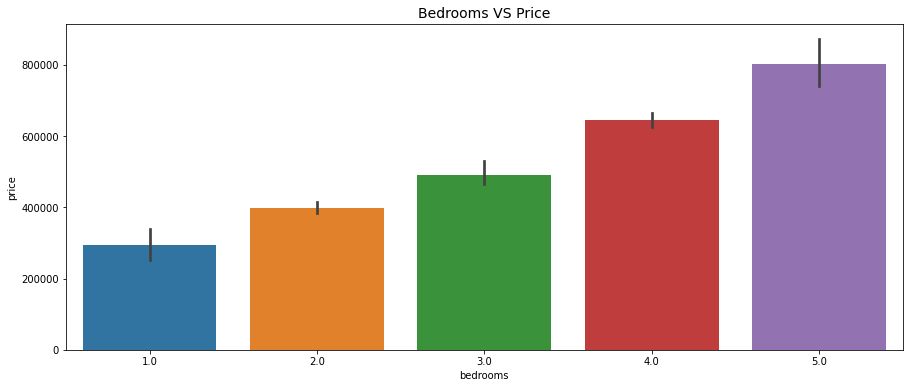

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bedrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

Text(0.5, 1.0, 'Bedrooms VS Sqft_living')

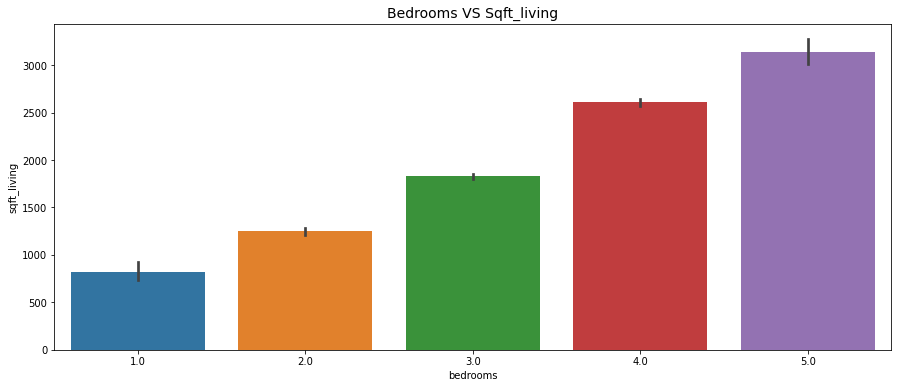

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bedrooms'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Sqft_living', fontsize=14)

In [ ]:
df.bathrooms.value_counts()

2.50    1182
1.00     742
1.75     625
2.00     422
2.25     415
1.50     289
2.75     263
3.50     157
3.00     156
3.25     135
3.75      34
4.00      20
4.25      20
4.50      19
0.75      17
4.75       7
5.00       4
1.25       3
5.50       3
5.25       3
6.25       2
6.50       1
6.75       1
Name: bathrooms, dtype: int64

Text(0.5, 1.0, 'Bathrooms VS Sqft_living')

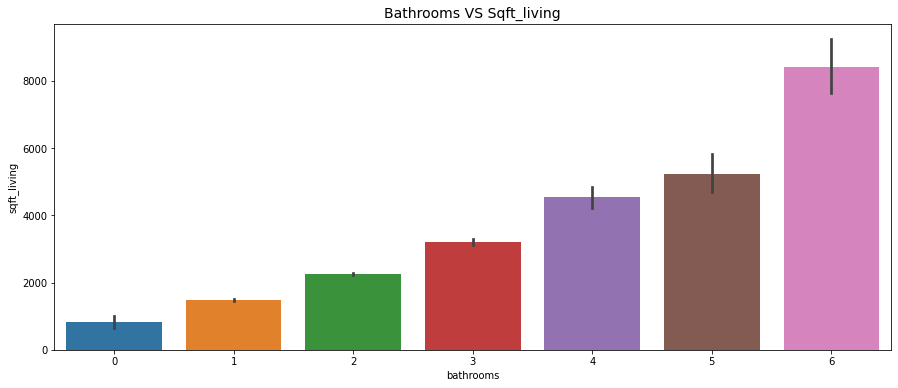

In [ ]:
df.bathrooms = df.bathrooms.astype(int)
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Sqft_living', fontsize=14)

Text(0.5, 1.0, 'Bathrooms VS Price')

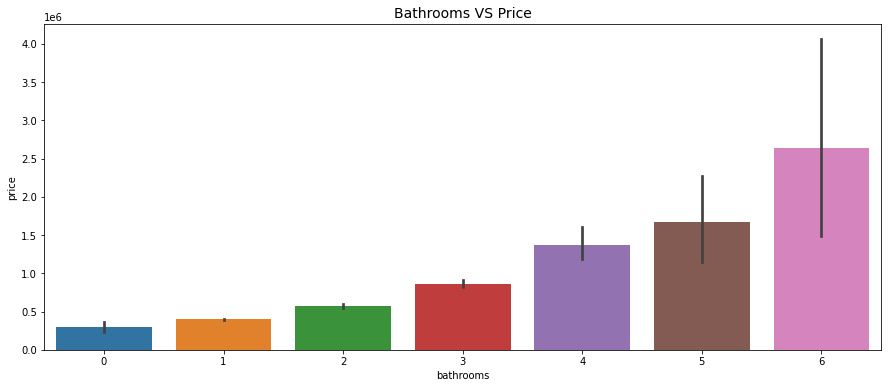

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Price', fontsize=14)

2    2282
1    1676
3     482
4      66
5      10
6       4
Name: bathrooms, dtype: int64

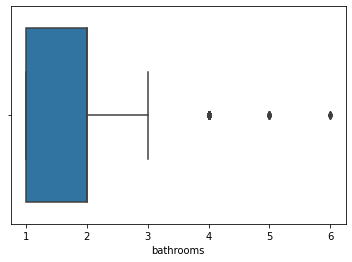

In [ ]:
df = df[(df['bathrooms'] < 8)]
df['bathrooms'].replace(to_replace = 0, value = 1, inplace = True)
sns.boxplot(x='bathrooms', data= df);
df.bathrooms.value_counts()

Text(0.5, 1.0, 'Bathrooms VS Sqft_living')

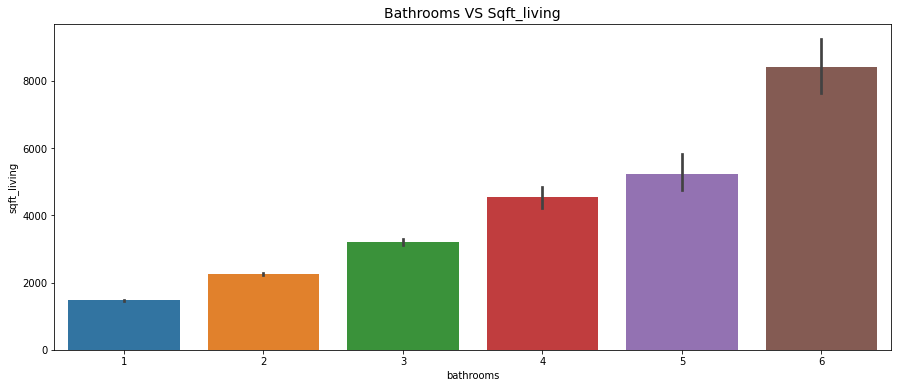

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Sqft_living', fontsize=14)

Text(0.5, 1.0, 'Bathrooms VS Price')

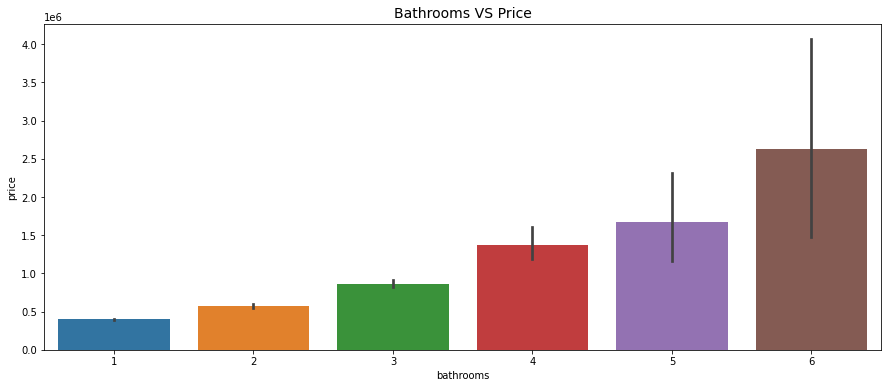

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Price', fontsize=14)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Price')

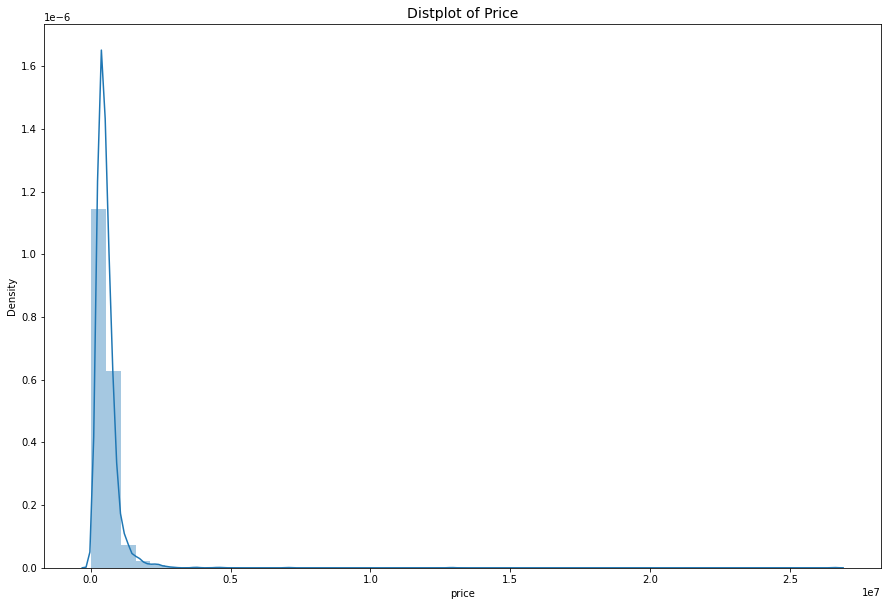

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=14)

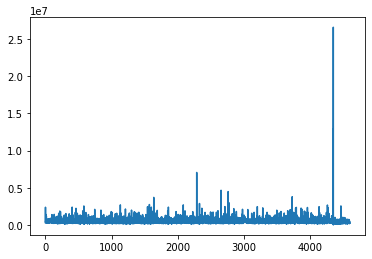

In [ ]:
df.price.plot();

In [ ]:
from scipy import stats
df['price'] = df['price'].replace([data['price'][np.abs(stats.zscore(data['price'])) > 3]],np.median(df['price']))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Price')

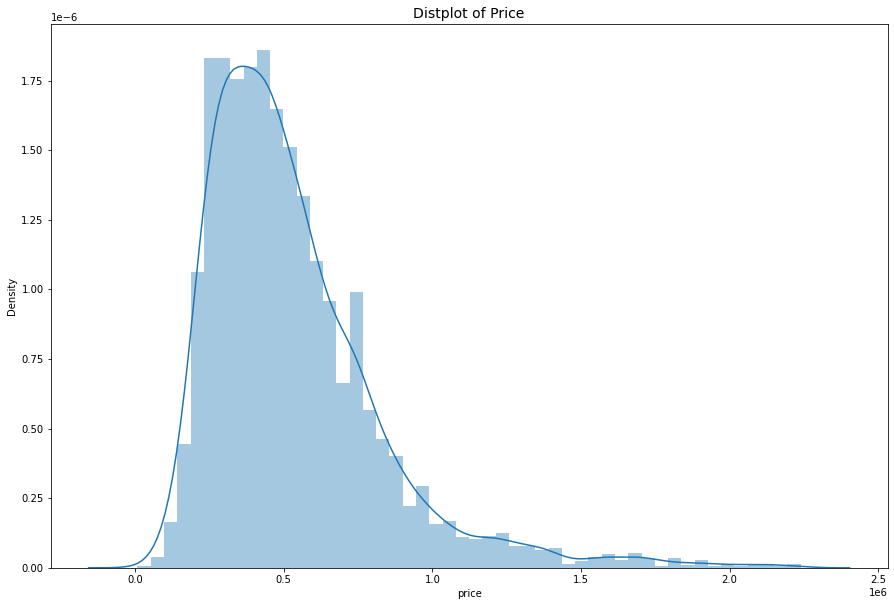

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=14)

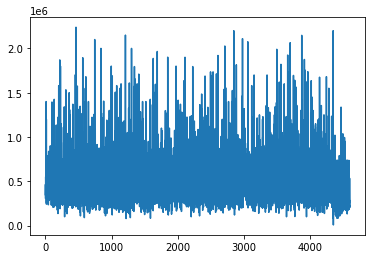

In [ ]:
df.price.plot();

Text(0.5, 1.0, 'Sqft_living VS Price')

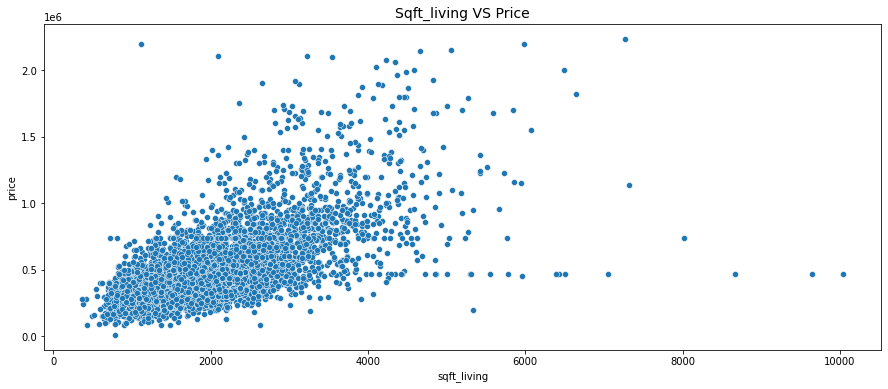

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_living VS Price')

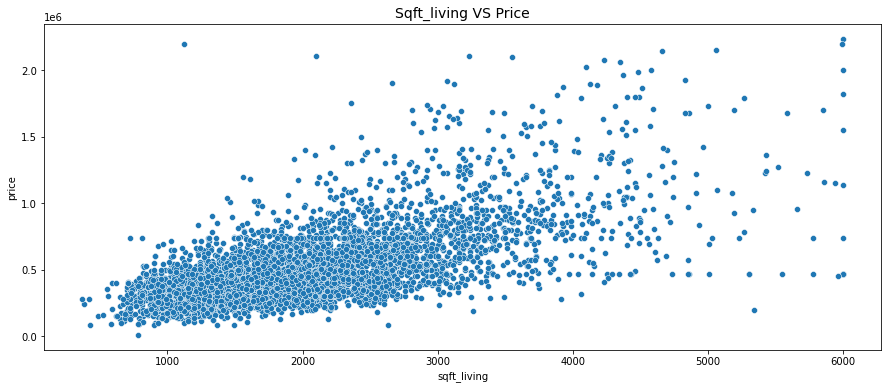

In [ ]:
df['sqft_living'] = np.where((df.sqft_living >6000 ), 6000, df.sqft_living)
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_lot VS Price')

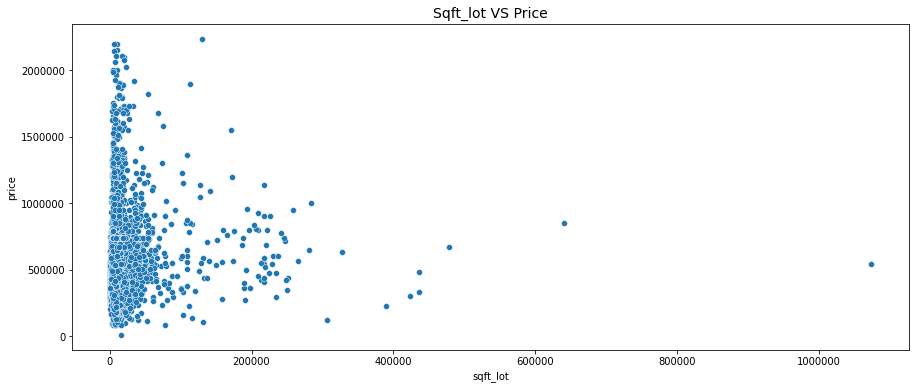

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_lot", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_lot VS Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_above VS Price')

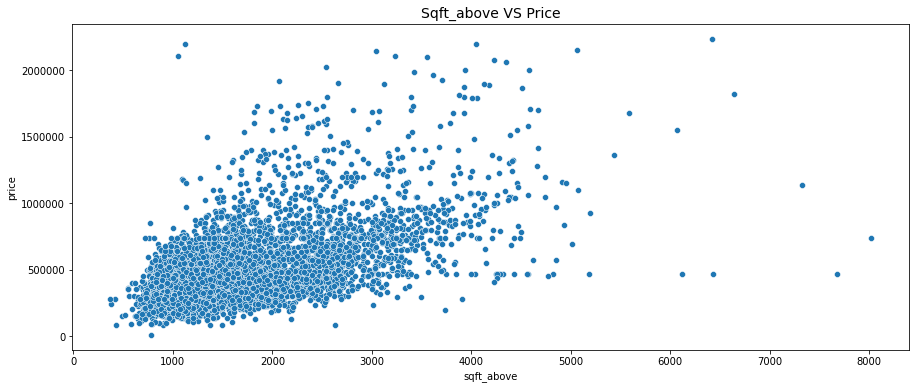

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_above", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_above VS Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_above VS Price')

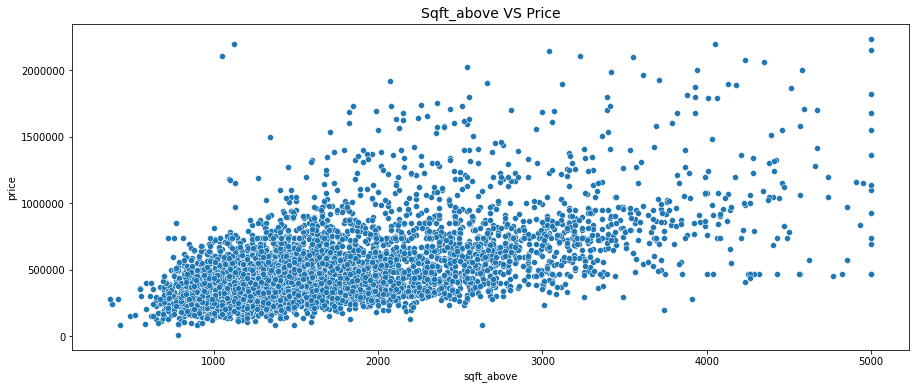

In [ ]:
df['sqft_above'] = np.where((df.sqft_above >5000 ), 5000, df.sqft_above)
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_above", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_above VS Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_basement VS Price')

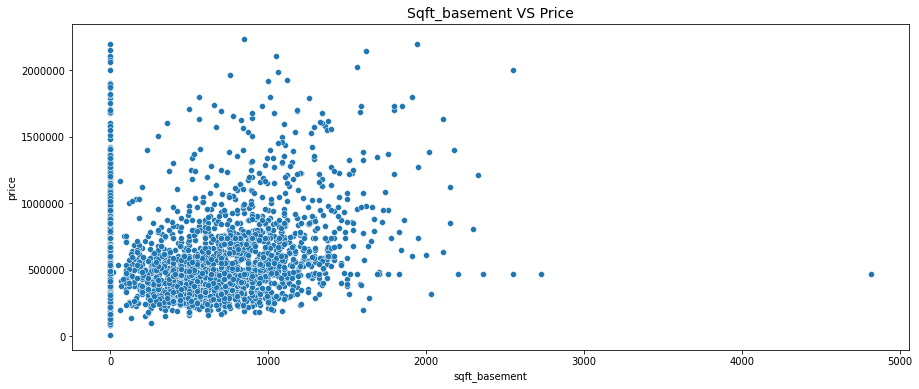

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_basement", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_basement VS Price', fontsize=14)

In [ ]:
df['sqft_basement'] = np.where((df.sqft_basement >2000 ), 2000, df.sqft_basement)

In [ ]:
df.floors.value_counts()

1.0    2143
2.0    1781
1.5     437
3.0     124
2.5      34
3.5       1
Name: floors, dtype: int64

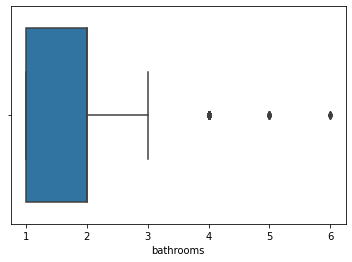

In [ ]:
df.floors = df.floors.astype(int)
sns.boxplot(x='bathrooms', data= df);

Tương quan giữa các đặc trưng

Text(0.5, 1.0, 'Floors VS Price')

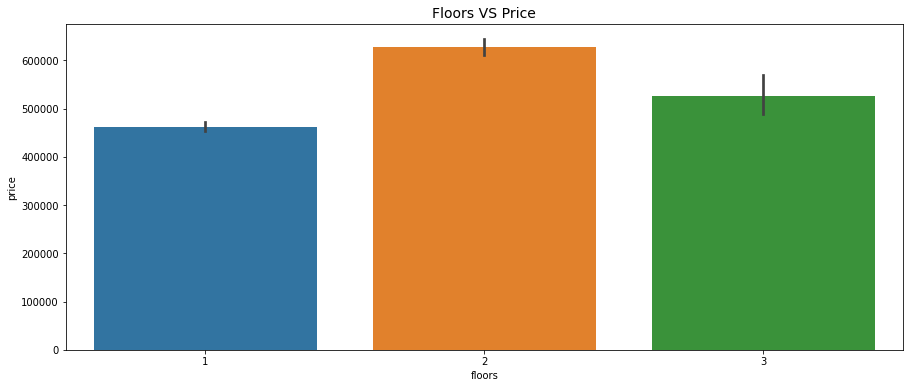

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['floors'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Floors VS Price', fontsize=14)

Text(0.5, 1.0, 'Floors VS Sqft_living')

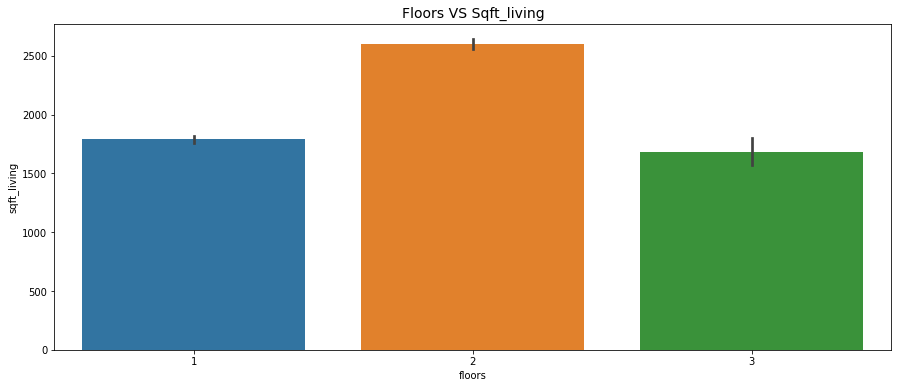

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['floors'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Floors VS Sqft_living', fontsize=14)

Text(0.5, 1.0, 'View VS Price')

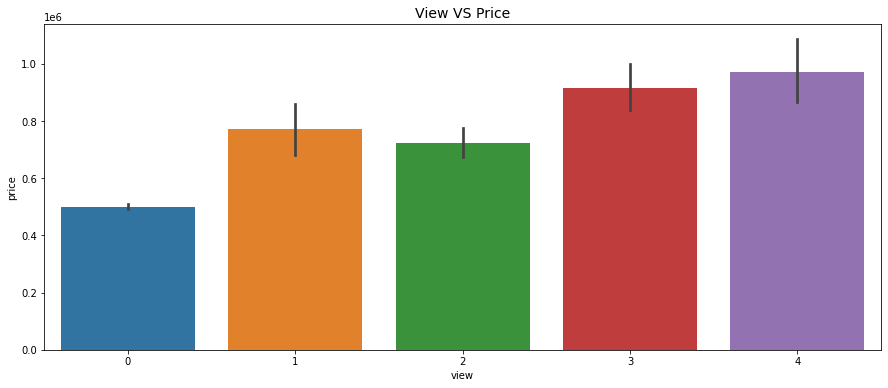

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['view'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('View VS Price', fontsize=14)

In [ ]:
view = df.groupby(['view']).price.agg([len , min, max])
view

,len,min,max
view,,,
0,4086,7800.000000,2238888.0
1,66,180785.714286,1965221.0
2,197,175000.000000,1925000.0
3,108,107500.000000,2027000.0
4,63,361000.000000,2200000.0


Text(0.5, 1.0, 'Condition VS Price')

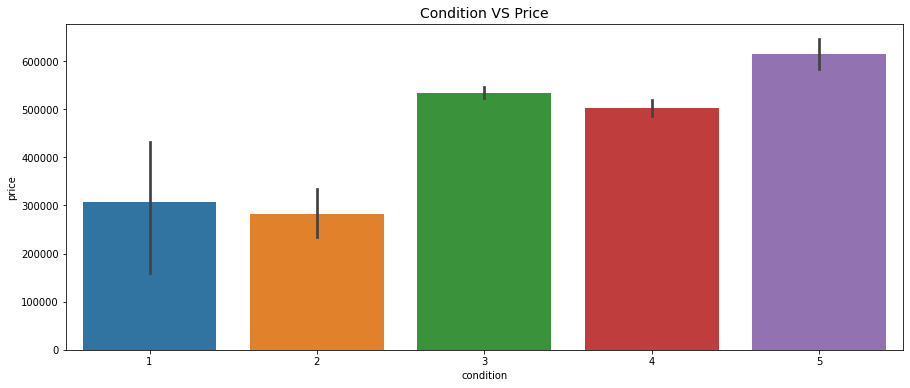

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['condition'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Condition VS Price', fontsize=14)

In [ ]:
condition = df.groupby(['condition']).price.agg([len , min, max])
condition

,len,min,max
condition,,,
2,37,7800.0,735000.0
3,2832,83000.0,2238888.0
4,1228,83300.0,2110000.0
5,423,83300.0,2147500.0


Text(0.5, 1.0, 'Condition VS Price')

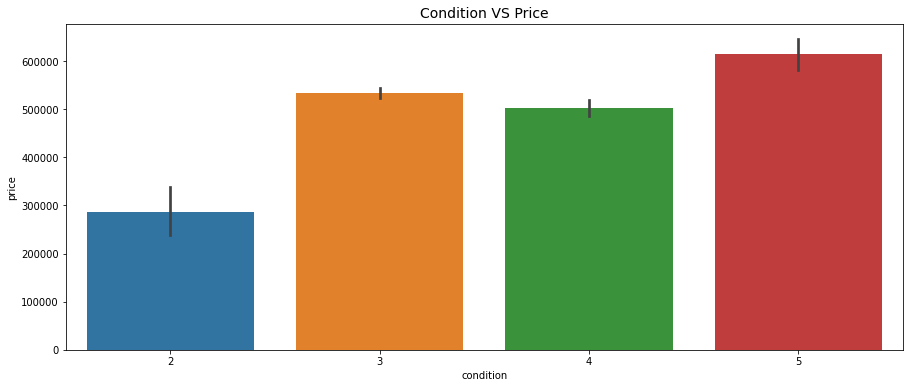

In [ ]:
df['condition'] = np.where((df.condition == 1 ), 2, df.condition)
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['condition'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Condition VS Price', fontsize=14)

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.333603,0.470637,0.645223,0.076962,0.240524,0.095491,0.324595,0.051693,0.553201,0.275975,0.042911,-0.052312
bedrooms,0.333603,1.000000,0.470732,0.603431,0.059259,0.167027,-0.007305,0.078067,0.014759,0.498587,0.300208,0.185980,-0.074805
bathrooms,0.470637,0.470732,1.000000,0.700351,0.088804,0.469881,0.081258,0.187882,-0.127920,0.638176,0.236458,0.415565,-0.195122
sqft_living,0.645223,0.603431,0.700351,1.000000,0.183712,0.344963,0.107580,0.284748,-0.071900,0.873537,0.404704,0.312415,-0.132700
sqft_lot,0.076962,0.059259,0.088804,0.183712,1.000000,-0.012354,0.015406,0.064696,0.002620,0.190743,0.012736,0.046097,-0.019268
floors,0.240524,0.167027,0.469881,0.344963,-0.012354,1.000000,0.016194,0.009376,-0.310888,0.523558,-0.275122,0.573203,-0.253345
waterfront,0.095491,-0.007305,0.081258,0.107580,0.015406,0.016194,1.000000,0.367877,0.002427,0.075493,0.089958,-0.023303,0.005825
view,0.324595,0.078067,0.187882,0.284748,0.064696,0.009376,0.367877,1.000000,0.057684,0.153188,0.300589,-0.069089,0.029421
condition,0.051693,0.014759,-0.127920,-0.071900,0.002620,-0.310888,0.002427,0.057684,1.000000,-0.189401,0.207881,-0.401139,-0.182910
sqft_above,0.553201,0.498587,0.638176,0.873537,0.190743,0.523558,0.075493,0.153188,-0.189401,1.000000,-0.088897,0.431120,-0.168604


In [ ]:
df.drop(['date','yr_built','yr_renovated','sqft_lot'], axis=1, inplace = True)

In [ ]:
X1 = df.drop(['street', 'city','statezip','country'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X1)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const             58.116728
price              1.841407
bedrooms           1.656049
bathrooms          2.280215
sqft_living      425.726824
floors             1.767343
waterfront         1.174893
view               1.365457
condition          1.157972
sqft_above       358.194975
sqft_basement    101.452651
dtype: float64

Text(0.5, 1.0, 'CORRELATION MATRIX')

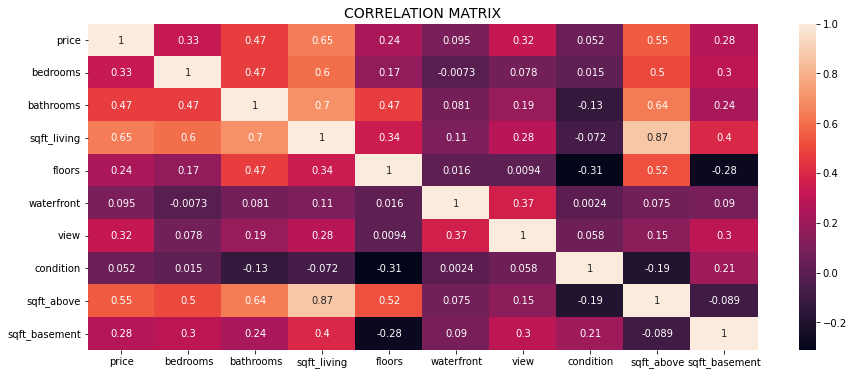

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.heatmap(df.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

In [ ]:
X_vif = X_vif.drop(['sqft_above'],axis = 1)
pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const            58.116702
price             1.832315
bedrooms          1.654227
bathrooms         2.279603
sqft_living       3.566497
floors            1.761834
waterfront        1.162541
view              1.364384
condition         1.157966
sqft_basement     1.672683
dtype: float64

In [ ]:
df.drop(['waterfront','condition','sqft_above'],axis=1, inplace=True)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,street,city,statezip,country
0,313000.0,3.0,1,1340,1,0,0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,465000.0,5.0,2,3650,2,4,280,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2,1930,1,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2,2000,1,0,1000,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2,1940,1,0,800,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.dtypes

price            float64
bedrooms         float64
bathrooms          int64
sqft_living        int64
floors             int64
view               int64
sqft_basement      int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
print(df['city'].nunique())
print(df['statezip'].nunique())

44
77


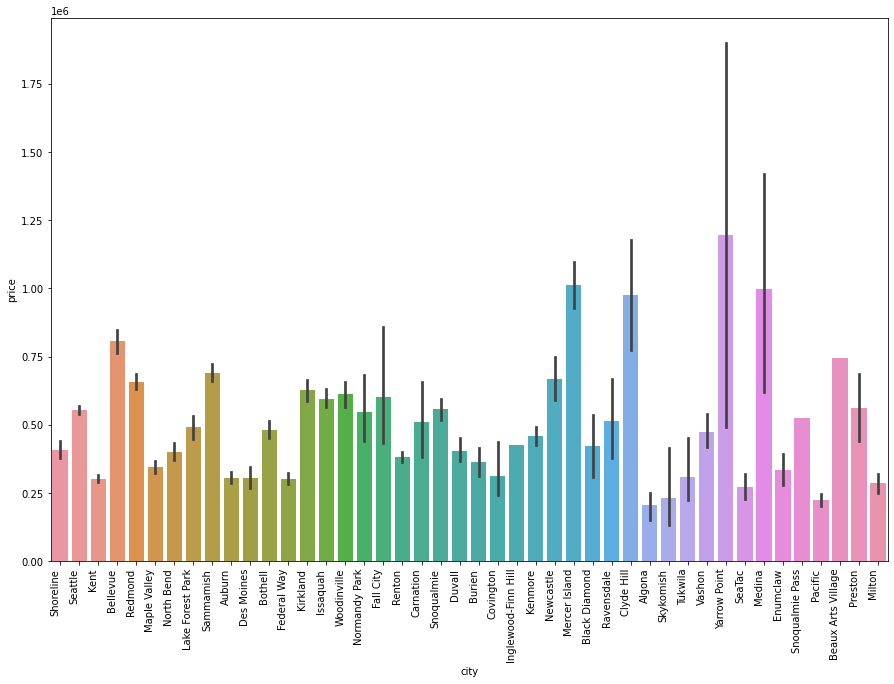

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="city", y="price", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

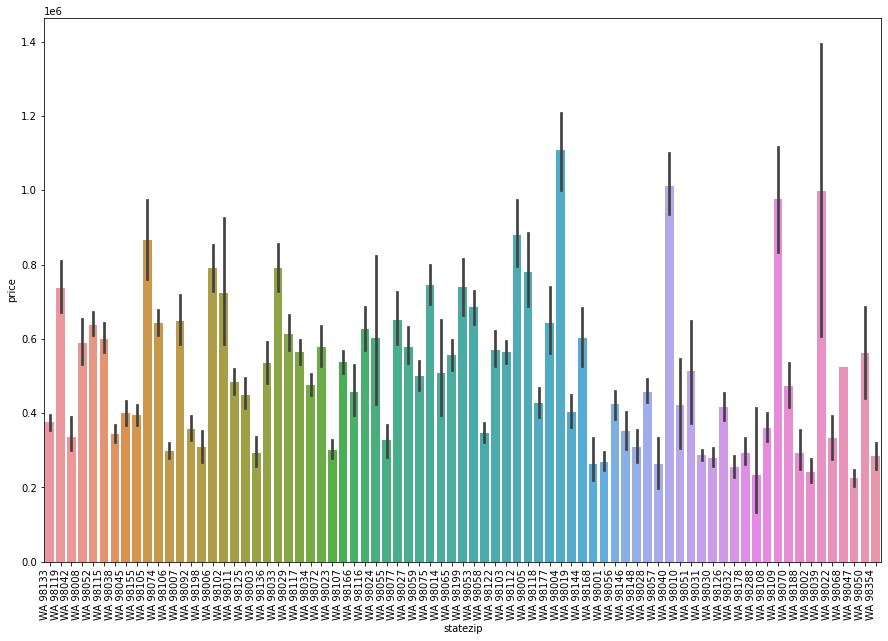

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="statezip", y="price", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

In [ ]:
df.drop(['street','city','country'],axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['statezip'], prefix = ['statezip'])
df.shape

(4520, 84)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'sqft_basement', 'statezip_WA 98001', 'statezip_WA 98002',
       'statezip_WA 98003', 'statezip_WA 98004', 'statezip_WA 98005',
       'statezip_WA 98006', 'statezip_WA 98007', 'statezip_WA 98008',
       'statezip_WA 98010', 'statezip_WA 98011', 'statezip_WA 98014',
       'statezip_WA 98019', 'statezip_WA 98022', 'statezip_WA 98023',
       'statezip_WA 98024', 'statezip_WA 98027', 'statezip_WA 98028',
       'statezip_WA 98029', 'statezip_WA 98030', 'statezip_WA 98031',
       'statezip_WA 98032', 'statezip_WA 98033', 'statezip_WA 98034',
       'statezip_WA 98038', 'statezip_WA 98039', 'statezip_WA 98040',
       'statezip_WA 98042', 'statezip_WA 98045', 'statezip_WA 98047',
       'statezip_WA 98050', 'statezip_WA 98051', 'statezip_WA 98052',
       'statezip_WA 98053', 'statezip_WA 98055', 'statezip_WA 98056',
       'statezip_WA 98057', 'statezip_WA 98058', 'statezip_WA 98059',
       'statezip_WA 

In [ ]:
X1 = df.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'sqft_basement'],axis = 1)
y = df["price"]

In [ ]:
import scipy.stats as stats
for i in X1.columns:
    print(stats.f_oneway(X1[i],y))

F_onewayResult(statistic=14629.99634464501, pvalue=0.0)
F_onewayResult(statistic=14629.996747470805, pvalue=0.0)
F_onewayResult(statistic=14629.996613195557, pvalue=0.0)
F_onewayResult(statistic=14629.996259197133, pvalue=0.0)
F_onewayResult(statistic=14629.99680850502, pvalue=0.0)
F_onewayResult(statistic=14629.995868578222, pvalue=0.0)
F_onewayResult(statistic=14629.99669864343, pvalue=0.0)
F_onewayResult(statistic=14629.996564368168, pvalue=0.0)
F_onewayResult(statistic=14629.997052641867, pvalue=0.0)
F_onewayResult(statistic=14629.996771884482, pvalue=0.0)
F_onewayResult(statistic=14629.996893952923, pvalue=0.0)
F_onewayResult(statistic=14629.996649816063, pvalue=0.0)
F_onewayResult(statistic=14629.996820711845, pvalue=0.0)
F_onewayResult(statistic=14629.99601506031, pvalue=0.0)
F_onewayResult(statistic=14629.997040435017, pvalue=0.0)
F_onewayResult(statistic=14629.996039473988, pvalue=0.0)
F_onewayResult(statistic=14629.99635685187, pvalue=0.0)
F_onewayResult(statistic=14629.99610

In [ ]:
baseline_models = ['Linear_Reg.','Random_Forest_Reg.','Dec_Tree_Reg.', 'Lassio_Reg.','XGB_Reg.']
cv_scores = []
cv_std = []

scores = []
df.to_csv("/content/data1.csv")

In [ ]:
baseline_models = ['Linear_Reg.','Random_Forest_Reg.','Lassio_Reg.','XGB_Reg.']

Train, Test 80 20

In [ ]:
X = df.drop(["price"],axis = 1)
y = df["price"]

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.2, random_state=8)

from sklearn.linear_model import LinearRegression
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)
print("Training accuracy: ", mlrm.score(train_X, train_y)
print("Testing accuracy: ", mlrm.score(test_X, test_y))
scores.append(mlrm.score(test_X, test_y))


68.1231891370166

In [ ]:
mlrm.score(test_X, test_y)

0.7193914846487625

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(train_X,train_y)
rf_model.score(train_X, train_y)*100

94.63739881541626

In [ ]:
rf_model.score(test_X, test_y)


0.6473899379149282

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 500, 700],
    'max_depth' : [4,6,8,10],
}


rf_reg = RandomForestRegressor(random_state=0)

rf_reg_cv = GridSearchCV(rf_reg, param_grid, cv= 5)
rf_reg_cv.fit(X,y)
print("Tuned Random Forest Regression Parameters: {}".format(rf_reg_cv.best_params_)) 
print("Best score is {}".format(rf_reg_cv.best_score_))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=10, n_estimators=500, max_features='sqrt', random_state=0)
rf_reg.fit(train_X,train_y)
print("Training accuracy: ", rf_reg.score(train_X,train_y))
print("Testing accuracy: ", rf_reg.score(test_X, test_y))
scores.append(rf_reg.score(test_X, test_y))

Training accuracy:  0.6430158047129756
Testing accuracy:  0.5376746646031929


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(max_iter=10000)
lasso_reg.fit(train_X, train_y)
print("Training accuracy: ", lasso_reg.score(train_X, train_y))
print("Testing accuracy: ", lasso_reg.score(test_X, test_y))
scores.append(lasso_reg.score(test_X,test_y))

Training accuracy:  0.6812316545399182
Testing accuracy:  0.7194029112467424


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.878e+13, tolerance: 3.097e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(max_depth= 3, n_estimators= 300, reg_lambda= 100)
xgb_reg.fit(train_X, train_y)
print("Training accuracy: ", xgb_reg.score(train_X, train_y))
print("Testing accuracy: ", xgb_reg.score(test_X, test_y))
scores.append(xgb_reg.score(test_X, test_y))

[13:00:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training accuracy:  0.6830804136187244
Testing accuracy:  0.6595795288650853


Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
cvscores_10 = cross_val_score(lin_reg, X, y, cv= 10)
m=np.mean(cvscores_10)
print(m)
cv_scores.append(m)

0.6571106341446324


In [ ]:
lin_reg = RandomForestRegressor()
cvscores_10 = cross_val_score(lin_reg, X, y, cv= 10)
m=np.mean(cvscores_10)
print(m)
cv_scores.append(m)

0.6212258112313543


In [ ]:
lin_reg = Lasso(max_iter=10000)
cvscores_10 = cross_val_score(lin_reg, X, y, cv= 10)
m=np.mean(cvscores_10)
print(m)
cv_scores.append(m)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+11, tolerance: 3.507e+10
  model = cd_fast.enet_coordinate_descent(


0.6571076386861249


In [ ]:
xgb_reg = XGBRegressor(max_depth= 3, n_estimators= 300, reg_lambda= 100)
cvscores_10 = cross_val_score(xgb_reg, X, y, cv= 10)
m=np.mean(cvscores_10)
print(m)
cv_scores.append(m)

[13:07:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
final_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_score['Score'] = scores
final_score['CVScore'] = cv_scores

In [ ]:
final_score

,Regressors,Score,CVScore
0,Linear_Reg.,0.719391,0.657111
1,Random_Forest_Reg.,0.537675,0.621226
2,Lassio_Reg.,0.719403,0.657108
3,XGB_Reg.,0.659580,0.628601


Compare

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


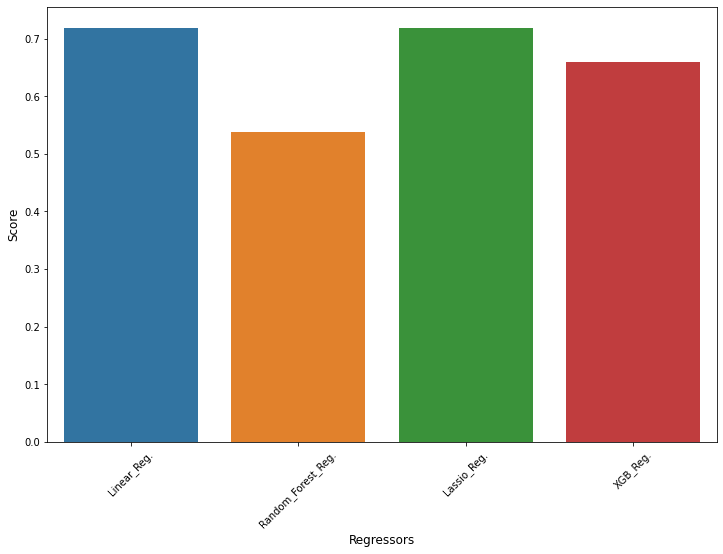

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(final_score['Regressors'],final_score['Score'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


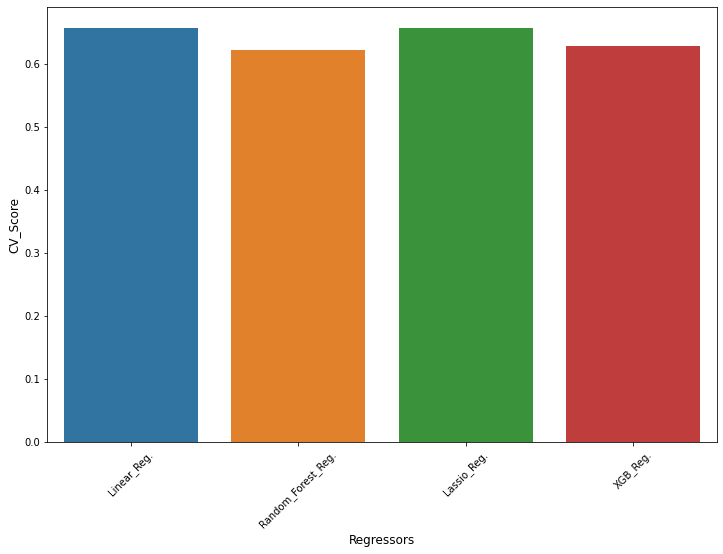

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(final_score['Regressors'],final_score['CVScore'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Score', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred= lasso_reg.predict(test_X)
print(r2_score(test_y, y_pred))

0.7194029112467424


In [ ]:
np.concatenate((test_y.values.reshape(904,1),y_pred.reshape(904,1)),1)

In [ ]:
y_pred= mlrm.predict(test_X)
ln_score = rmse(test_y,y_pred)
r2_score(test_y, y_pred)
print(ln_score)
print(r2_score(test_y, y_pred))


160417.94689726
0.7193914846487625


In [ ]:
np.concatenate((test_y.values.reshape(904,1),y_pred.reshape(904,1)),1)

array([[287500.       , 336043.109375 ],
       [479000.       , 557960.328125 ],
       [594000.       , 590124.5625   ],
       ...,
       [530000.       , 701226.59375  ],
       [387000.       , 416663.390625 ],
       [295000.       , 393997.0078125]])

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(train_y, train_X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     92.08
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:31:27   Log-Likelihood:                -48577.
No. Observations:                3616   AIC:                         9.732e+04
Df Residuals:                    3533   BIC:                         9.783e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms           -229.5520   4401.13